In [253]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [254]:
# Read trader data
trades = pd.read_csv("historical_data.csv")
# Read fear & greed index
sentiment = pd.read_csv("fear_greed_index.csv")


In [255]:
trades.head()           # First 5 rows


,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12


In [256]:
trades.info()           # Column names, data types, nulls

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211224 entries, 0 to 211223
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Account           211224 non-null  object 
 1   Coin              211224 non-null  object 
 2   Execution Price   211224 non-null  float64
 3   Size Tokens       211224 non-null  float64
 4   Size USD          211224 non-null  float64
 5   Side              211224 non-null  object 
 6   Timestamp IST     211224 non-null  object 
 7   Start Position    211224 non-null  float64
 8   Direction         211224 non-null  object 
 9   Closed PnL        211224 non-null  float64
 10  Transaction Hash  211224 non-null  object 
 11  Order ID          211224 non-null  int64  
 12  Crossed           211224 non-null  bool   
 13  Fee               211224 non-null  float64
 14  Trade ID          211224 non-null  float64
 15  Timestamp         211224 non-null  float64
dtypes: bool(1), float64(

In [257]:
trades.describe()  # Summary stats for numeric columns

,Execution Price,Size Tokens,Size USD,Start Position,Closed PnL,Order ID,Fee,Trade ID,Timestamp
count,211224.000000,2.112240e+05,2.112240e+05,2.112240e+05,211224.000000,2.112240e+05,211224.000000,2.112240e+05,2.112240e+05
mean,11414.723350,4.623365e+03,5.639451e+03,-2.994625e+04,48.749001,6.965388e+10,1.163967,5.628549e+14,1.737744e+12
std,29447.654868,1.042729e+05,3.657514e+04,6.738074e+05,919.164828,1.835753e+10,6.758854,3.257565e+14,8.689920e+09
min,0.000005,8.740000e-07,0.000000e+00,-1.433463e+07,-117990.104100,1.732711e+08,-1.175712,0.000000e+00,1.680000e+12
25%,4.854700,2.940000e+00,1.937900e+02,-3.762311e+02,0.000000,5.983853e+10,0.016121,2.810000e+14,1.740000e+12
50%,18.280000,3.200000e+01,5.970450e+02,8.472793e+01,0.000000,7.442939e+10,0.089578,5.620000e+14,1.740000e+12
75%,101.580000,1.879025e+02,2.058960e+03,9.337278e+03,5.792797,8.335543e+10,0.393811,8.460000e+14,1.740000e+12
max,109004.000000,1.582244e+07,3.921431e+06,3.050948e+07,135329.090100,9.014923e+10,837.471593,1.130000e+15,1.750000e+12


In [258]:
trades.head()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12


In [259]:
trades.columns

Index(['Account', 'Coin', 'Execution Price', 'Size Tokens', 'Size USD', 'Side',
       'Timestamp IST', 'Start Position', 'Direction', 'Closed PnL',
       'Transaction Hash', 'Order ID', 'Crossed', 'Fee', 'Trade ID',
       'Timestamp'],
      dtype='object')

In [260]:
sentiment.head()


,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05


In [261]:
sentiment.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2644 entries, 0 to 2643
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   timestamp       2644 non-null   int64 
 1   value           2644 non-null   int64 
 2   classification  2644 non-null   object
 3   date            2644 non-null   object
dtypes: int64(2), object(2)
memory usage: 82.8+ KB


In [262]:
sentiment.describe()

,timestamp,value
count,2.644000e+03,2644.000000
mean,1.631899e+09,46.981089
std,6.597967e+07,21.827680
min,1.517463e+09,5.000000
25%,1.574811e+09,28.000000
50%,1.631900e+09,46.000000
75%,1.688989e+09,66.000000
max,1.746164e+09,95.000000


In [263]:
df = merged.copy()

# Convert numerics
for col in ['Closed PnL', 'Size USD', 'Size Tokens', 'Execution Price']:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Profitability flag
df['is_profitable'] = df['Closed PnL'] > 0

# Long/short: BUY = 1, SELL = -1
df['side_numeric'] = df['Side'].map({'BUY': 1, 'SELL': -1})

# Daily aggregation by date + sentiment
daily = df.groupby(['trade_date', 'classification']).agg({
    'Closed PnL': ['sum', 'mean'],
    'Size USD': 'sum',
    'is_profitable': 'mean',
    'side_numeric': 'mean'
})

daily.columns = ['_'.join(col).strip() for col in daily.columns.values]
daily.reset_index(inplace=True)


In [264]:
print("Win rate by sentiment:")
print(daily.groupby('classification')['is_profitable_mean'].mean().to_dict())

print("\nAvg daily PnL by sentiment:")
print(daily.groupby('classification')['Closed PnL_sum'].mean().to_dict())

print("\nLong/short bias by sentiment (positive=long, negative=short):")
print(daily.groupby('classification')['side_numeric_mean'].mean().to_dict())

print("\nAvg daily volume (Size USD) by sentiment:")
print(daily.groupby('classification')['Size USD_sum'].mean().to_dict())


Win rate by sentiment:
{'Extreme Fear': 0.32734082697603883, 'Extreme Greed': 0.4674238865175576, 'Fear': 0.3291124444268537, 'Greed': 0.335985537160085, 'Neutral': 0.33188630490067184}

Avg daily PnL by sentiment:
{'Extreme Fear': 52793.589177857146, 'Extreme Greed': 23817.292198885963, 'Fear': 36891.81804002198, 'Greed': 11140.566181093263, 'Neutral': 19297.323515671644}

Long/short bias by sentiment (positive=long, negative=short):
{'Extreme Fear': -0.026924315396797793, 'Extreme Greed': -0.08639381556218112, 'Fear': 0.02699014670104212, 'Greed': -0.013045143176083627, 'Neutral': -0.00035108313204732454}

Avg daily volume (Size USD) by sentiment:
{'Extreme Fear': 8177447.245714285, 'Extreme Greed': 1091799.6892105262, 'Fear': 5311261.426263737, 'Greed': 1495246.0866321241, 'Neutral': 2690180.045970149}


# **Win Rate vs Market Sentiment**

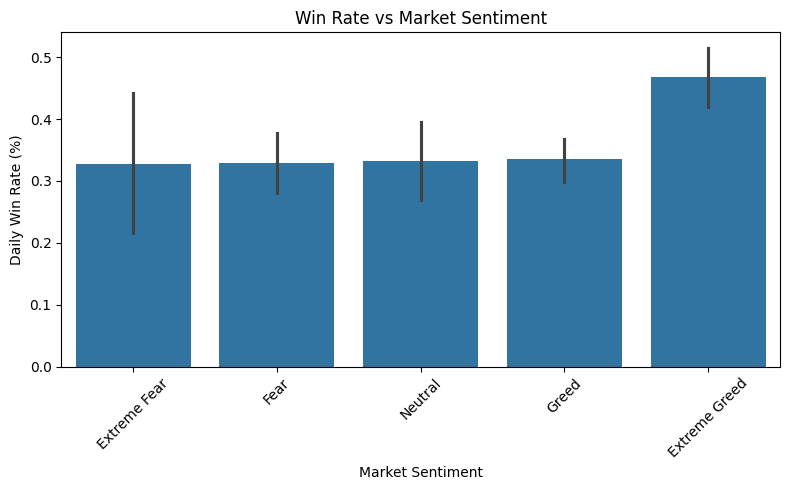

In [265]:
plt.figure(figsize=(8,5))
sns.barplot(
    data=daily_sorted,
    x="classification",
    y="is_profitable_mean",
    estimator=lambda x: x.mean()
)

plt.title("Win Rate vs Market Sentiment")
plt.xlabel("Market Sentiment")
plt.ylabel("Daily Win Rate (%)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("outputs/win_rate_by_sentiment.png")
plt.show()


# **Average Daily PnL vs Sentiment**

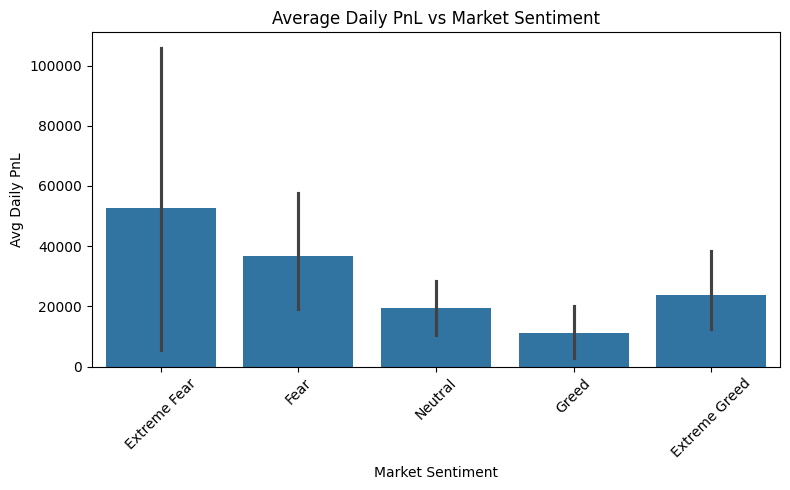

In [266]:
plt.figure(figsize=(8,5))
sns.barplot(
    data=daily_sorted,
    x="classification",
    y="Closed PnL_sum",
    estimator=lambda x: x.mean()
)

plt.title("Average Daily PnL vs Market Sentiment")
plt.xlabel("Market Sentiment")
plt.ylabel("Avg Daily PnL")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("outputs/pnl_by_sentiment.png")
plt.show()


# **Average Daily Volume (USD) vs Sentiment**

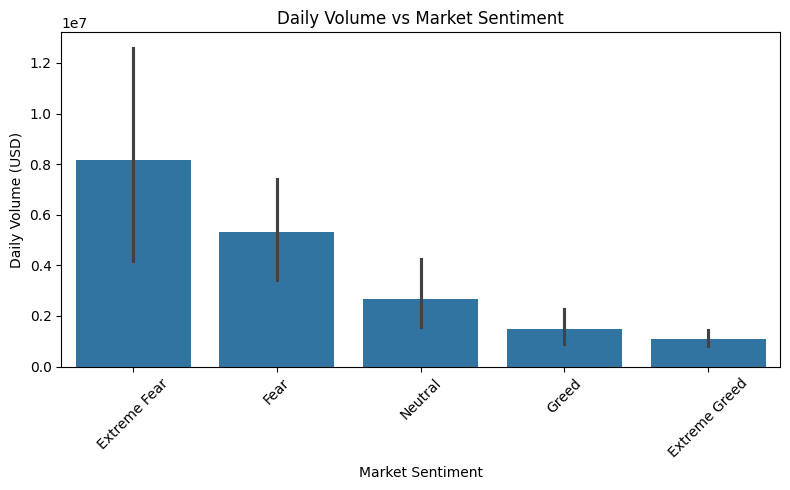

In [267]:
plt.figure(figsize=(8,5))
sns.barplot(
    data=daily_sorted,
    x="classification",
    y="Size USD_sum",
    estimator=lambda x: x.mean()
)

plt.title("Daily Volume vs Market Sentiment")
plt.xlabel("Market Sentiment")
plt.ylabel("Daily Volume (USD)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("outputs/volume_by_sentiment.png")
plt.show()


# **Long/Short Bias vs Sentiment**

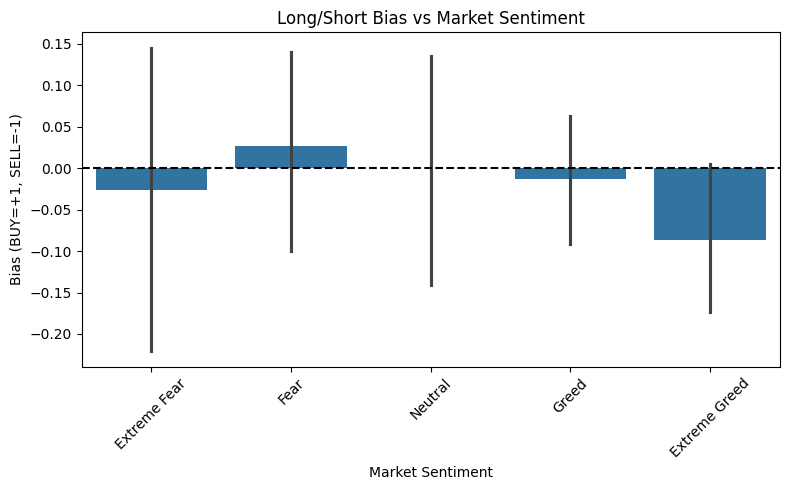

In [268]:
plt.figure(figsize=(8,5))
sns.barplot(
    data=daily_sorted,
    x="classification",
    y="side_numeric_mean",
    estimator=lambda x: x.mean()
)

plt.axhline(0, color="black", linestyle="--")
plt.title("Long/Short Bias vs Market Sentiment")
plt.xlabel("Market Sentiment")
plt.ylabel("Bias (BUY=+1, SELL=-1)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("outputs/long_short_bias_by_sentiment.png")
plt.show()
